# Non-Negative Matrix Factorization Definition

- Linear algeabric model, factoring high dimensional vectors into a low-dimensional vector. The vectors are all non-negative, forcing the coefficients to be non-negative.
- Intuition: 
  - Given **matrix A** of `documents by words`→(NMF)→ **matrix W** with `topic by words` and **coefficient matrix H** with `documents by topics`
  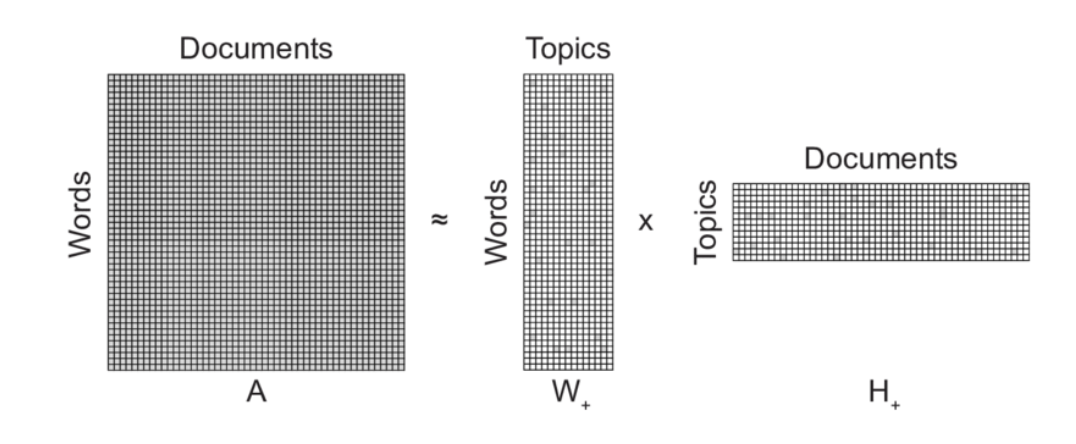

# Maths
- Goal: quantify the distance between the elements.
   - Generalized Kullback–Leibler divergence
      - Minimize the conventional least squares errors
      
   - Frobenius norm
- Paper: [Algorithms for Non-negative Matrix Factorization](https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf)
- Cost function: 
   - we assume the distance between two non-negative matrices A and B, using square the Euclidean distance between A and B, which is lower bounded by zero and vanishes if and only if A=B.
        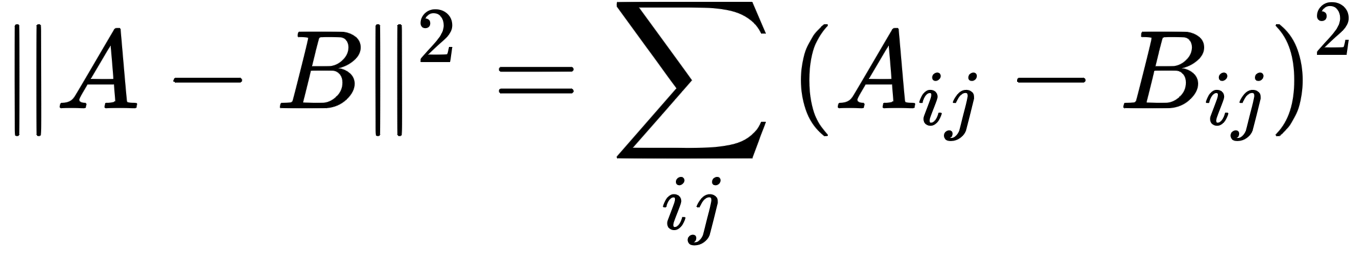
   - Another way
        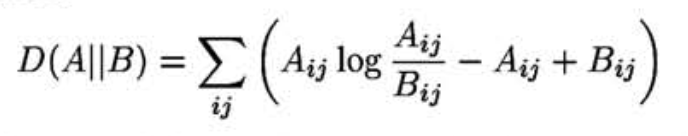

we use `multiplicative update rules` to minimize `||A-WH||^2` and `D(A||WH)`,subject to W, H≥0. The multiplication factor is unity when A=W*H. Hence, the perfect reconstruction should better be a fixed point of the update rules.

 - W: every topic and what terms in it. Each column represents the *weightage* of each word got in the sentence.A linear combination of columns. (Basic Matrix)
 - H: every document and what topics in it. Each row is word *embedding*. (Coefficient Matrix)

# When we use NMF model?
  - NMF produces sparse representations, which means most of entries are very close to 0 and few parameters have significant values than SVD.
  - NMF creates *more coherence topics* than LDA

- Application:
   - Recommender System
   - Document Clustering
   - Missing data manipulation
   - Computer Vision
   - Speech denoising in audio signal processing



# Quora Topic Modeling 

In [48]:
#import python package
import pandas as pd
import random
import re

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [49]:
#import dataset
data=pd.read_csv('/content/quora_questions.csv')

In [50]:
data.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


# Text Preprocessing 

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
def clean_text(sentence):
    pattern = re.compile(r'[^a-z]+')                                            #remove alphabetic                     
    sentence = sentence.lower()                                                 #set words into lowercase
    sentence = pattern.sub(' ', sentence).strip()                               #remove any space at beginning and ending
    wordlist=word_tokenize(sentence)                                            #tokenization break up into individual words
    stopwords_list=set(stopwords.words('english'))                              #get stopwords lists
    wordlist = [word for word in wordlist if word not in stopwords_list]        #remove stopwords from word lists
    wordlist = [word for word in wordlist if len(word) > 2]                     #remove small length words
    lemma = WordNetLemmatizer()                                                 #lemmatization use wordnet
    wordlist = [lemma.lemmatize(word) for word in wordlist]
    sentence = ' '.join(wordlist)                                               #combine wordslist into sentence with space
    return sentence

In [53]:
#apply the text cleaning funtion to dataset
data['Question'] = data['Question'].apply(lambda x: clean_text(str(x)))

In [54]:
#check the after-cleaning result
data.head()

,Question
0,step step guide invest share market india
1,story kohinoor koh noor diamond
2,increase speed internet connection using vpn
3,mentally lonely solve
4,one dissolve water quikly sugar salt methane c...


# EDA

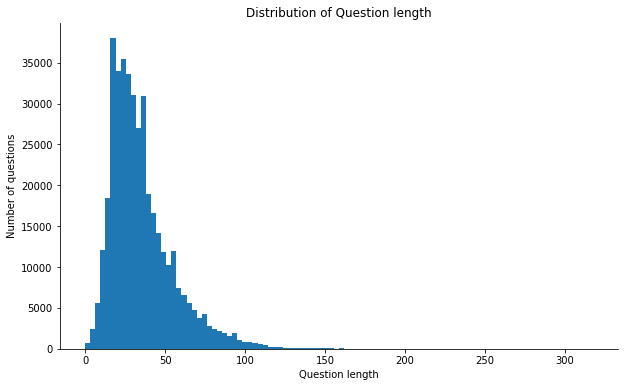

In [55]:
#how long the questions are
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in data.Question]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Question length')
plt.ylabel('Number of questions')
plt.xlabel('Question length')
sns.despine()

# Get Document-Term Matrix

In [56]:
tfidf_vector = TfidfVectorizer(tokenizer=lambda x: str(x).split(),
                                               stop_words='english',
                                               max_df=0.95, 
                                               min_df=2,
                                               smooth_idf=True,
                                               max_features=4000)
X = tfidf_vector.fit_transform(data['Question'])

In [57]:
X.shape

(404289, 4000)

# NMF Modeling

In [71]:
#Build the model,reference:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
NMF_Model = NMF(n_components=10,                                                #we set it 10 topics
                random_state=42)

In [72]:
NMF_Model.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=10, random_state=42)

In [73]:
len(tfidf_vector.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4000

In [74]:
NMF_Model.components_

array([[3.16302270e-04, 9.89374090e-05, 0.00000000e+00, ...,
        1.00498586e-02, 2.88051534e-03, 0.00000000e+00],
       [4.07815121e-04, 3.50484947e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.13613336e-03],
       [2.09517252e-04, 1.56426126e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.34605211e-03, 0.00000000e+00],
       ...,
       [8.25978204e-04, 8.57961246e-05, 0.00000000e+00, ...,
        0.00000000e+00, 1.05027247e-03, 2.72543028e-03],
       [1.14204705e-03, 6.73229454e-04, 3.30022571e-04, ...,
        3.31514227e-03, 3.38602422e-03, 0.00000000e+00],
       [3.60788390e-04, 1.65212372e-04, 1.10912208e-03, ...,
        0.00000000e+00, 3.72702884e-04, 1.94288657e-03]])

In [75]:
len(NMF_Model.components_)

10

In [76]:
single_topic = NMF_Model.components_[0]

In [77]:
single_topic.argsort()

array([1999, 1873, 1872, ...,  411, 3895,  354])

In [78]:
#show the NMF words in each topic
for index,topic in enumerate(NMF_Model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_vector.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['friend', 'song', 'visit', 'website', 'weight', 'time', 'site', 'buy', 'phone', 'place', 'laptop', 'movie', 'book', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['marked', 'interview', 'add', 'answered', 'post', 'easily', 'needing', 'delete', 'improvement', 'google', 'asked', 'ask', 'answer', 'question', 'quora']


THE TOP 15 WORDS FOR TOPIC #2
['software', 'basic', 'computer', 'data', 'example', 'science', 'major', 'western', 'engineering', 'main', 'chinese', 'culture', 'similarity', 'love', 'difference']


THE TOP 15 WORDS FOR TOPIC #3
['culture', 'friend', 'person', 'love', 'know', 'live', 'time', 'woman', 'guy', 'look', 'sex', 'work', 'girl', 'feel', 'like']


THE TOP 15 WORDS FOR TOPIC #4
['video', 'easiest', 'com', 'friend', 'rupee', 'home', 'easy', 'youtube', 'note', 'black', 'way', 'earn', 'online', 'money', 'make']


THE TOP 15 WORDS FOR TOPIC #5
['job', 'think', 'hillary', 'rupee', 'clinton', 'country', 'indian', 'win', 'president', 'war', 'no

In [79]:
topic_results = NMF_Model.transform(X)

In [80]:
topic_results.shape
# 288398 quora questions and 20 topics with probability as value in this matrix

(404289, 10)

In [81]:
topic_results[0]

array([2.66504287e-04, 0.00000000e+00, 9.83044312e-05, 0.00000000e+00,
       4.25345841e-04, 2.73336776e-02, 0.00000000e+00, 1.15934295e-05,
       0.00000000e+00, 8.97709976e-04])

In [82]:
#Add topic result into column
data['Topic_NMF'] = topic_results.argmax(axis=1)

In [83]:
data.head(10)

,Question,Topic_NMF
0,step step guide invest share market india,5
1,story kohinoor koh noor diamond,7
2,increase speed internet connection using vpn,4
3,mentally lonely solve,3
4,one dissolve water quikly sugar salt methane c...,5
5,astrology capricorn sun cap moon cap rising say,6
6,buy tiago,0
7,good geologist,7
8,use instead,6
9,motorola company hack charter motorolla dcx,5
